In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import ipywidgets as widgets
import operator
import pandas as pd
from IPython import display
from iarchitect.trainer import Trainer
from iarchitect.common import create_policy_eval_video
from iarchitect.solutions import read_args,make_environment

p = Path.cwd().parents[1] / "iarchitect" / "solutions"
sols = [str(d.name) for d in p.iterdir() if not d.is_file()]

2022-03-08 15:43:05.802228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 15:43:05.802265: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
cbox = widgets.RadioButtons(
    placeholder="Choose Solution",
    options=sols,
    description='Choose Solution:',
    ensure_option=True,
    disabled=False
)
cbox

RadioButtons(description='Choose Solution:', options=('__pycache__', 'Aligned_Row_Big', 'WindowEnvWhatPlantGro…

In [4]:
assert cbox.value in sols
psols = p / cbox.value
results = []
results2 = []
for d in psols.iterdir():
    if d.is_file():
        if d.suffix==".png":
            num_res,date,num_step = d.stem.split("_")
            results.append((num_res,date,num_step ))
    if d.is_dir() and d.name[:min(len("policy"),len(d.name))]=="policy":
        date,num_step = d.name.split("_")
        date=date[len("policy"):]
        results2.append((date,num_step))
df = pd.DataFrame(results).sort_values(by=1,ascending=False)
df2 = pd.DataFrame(results2).sort_values(by=1,ascending=False)

cbox2 = widgets.Combobox(
    placeholder="Choose Iteration",
    options=list(df[2].values),
    description='Choose Step:',
    ensure_option=True,
    disabled=False
)
cbox2

Combobox(value='', description='Choose Step:', ensure_option=True, options=('990', '980', '970', '960', '950',…

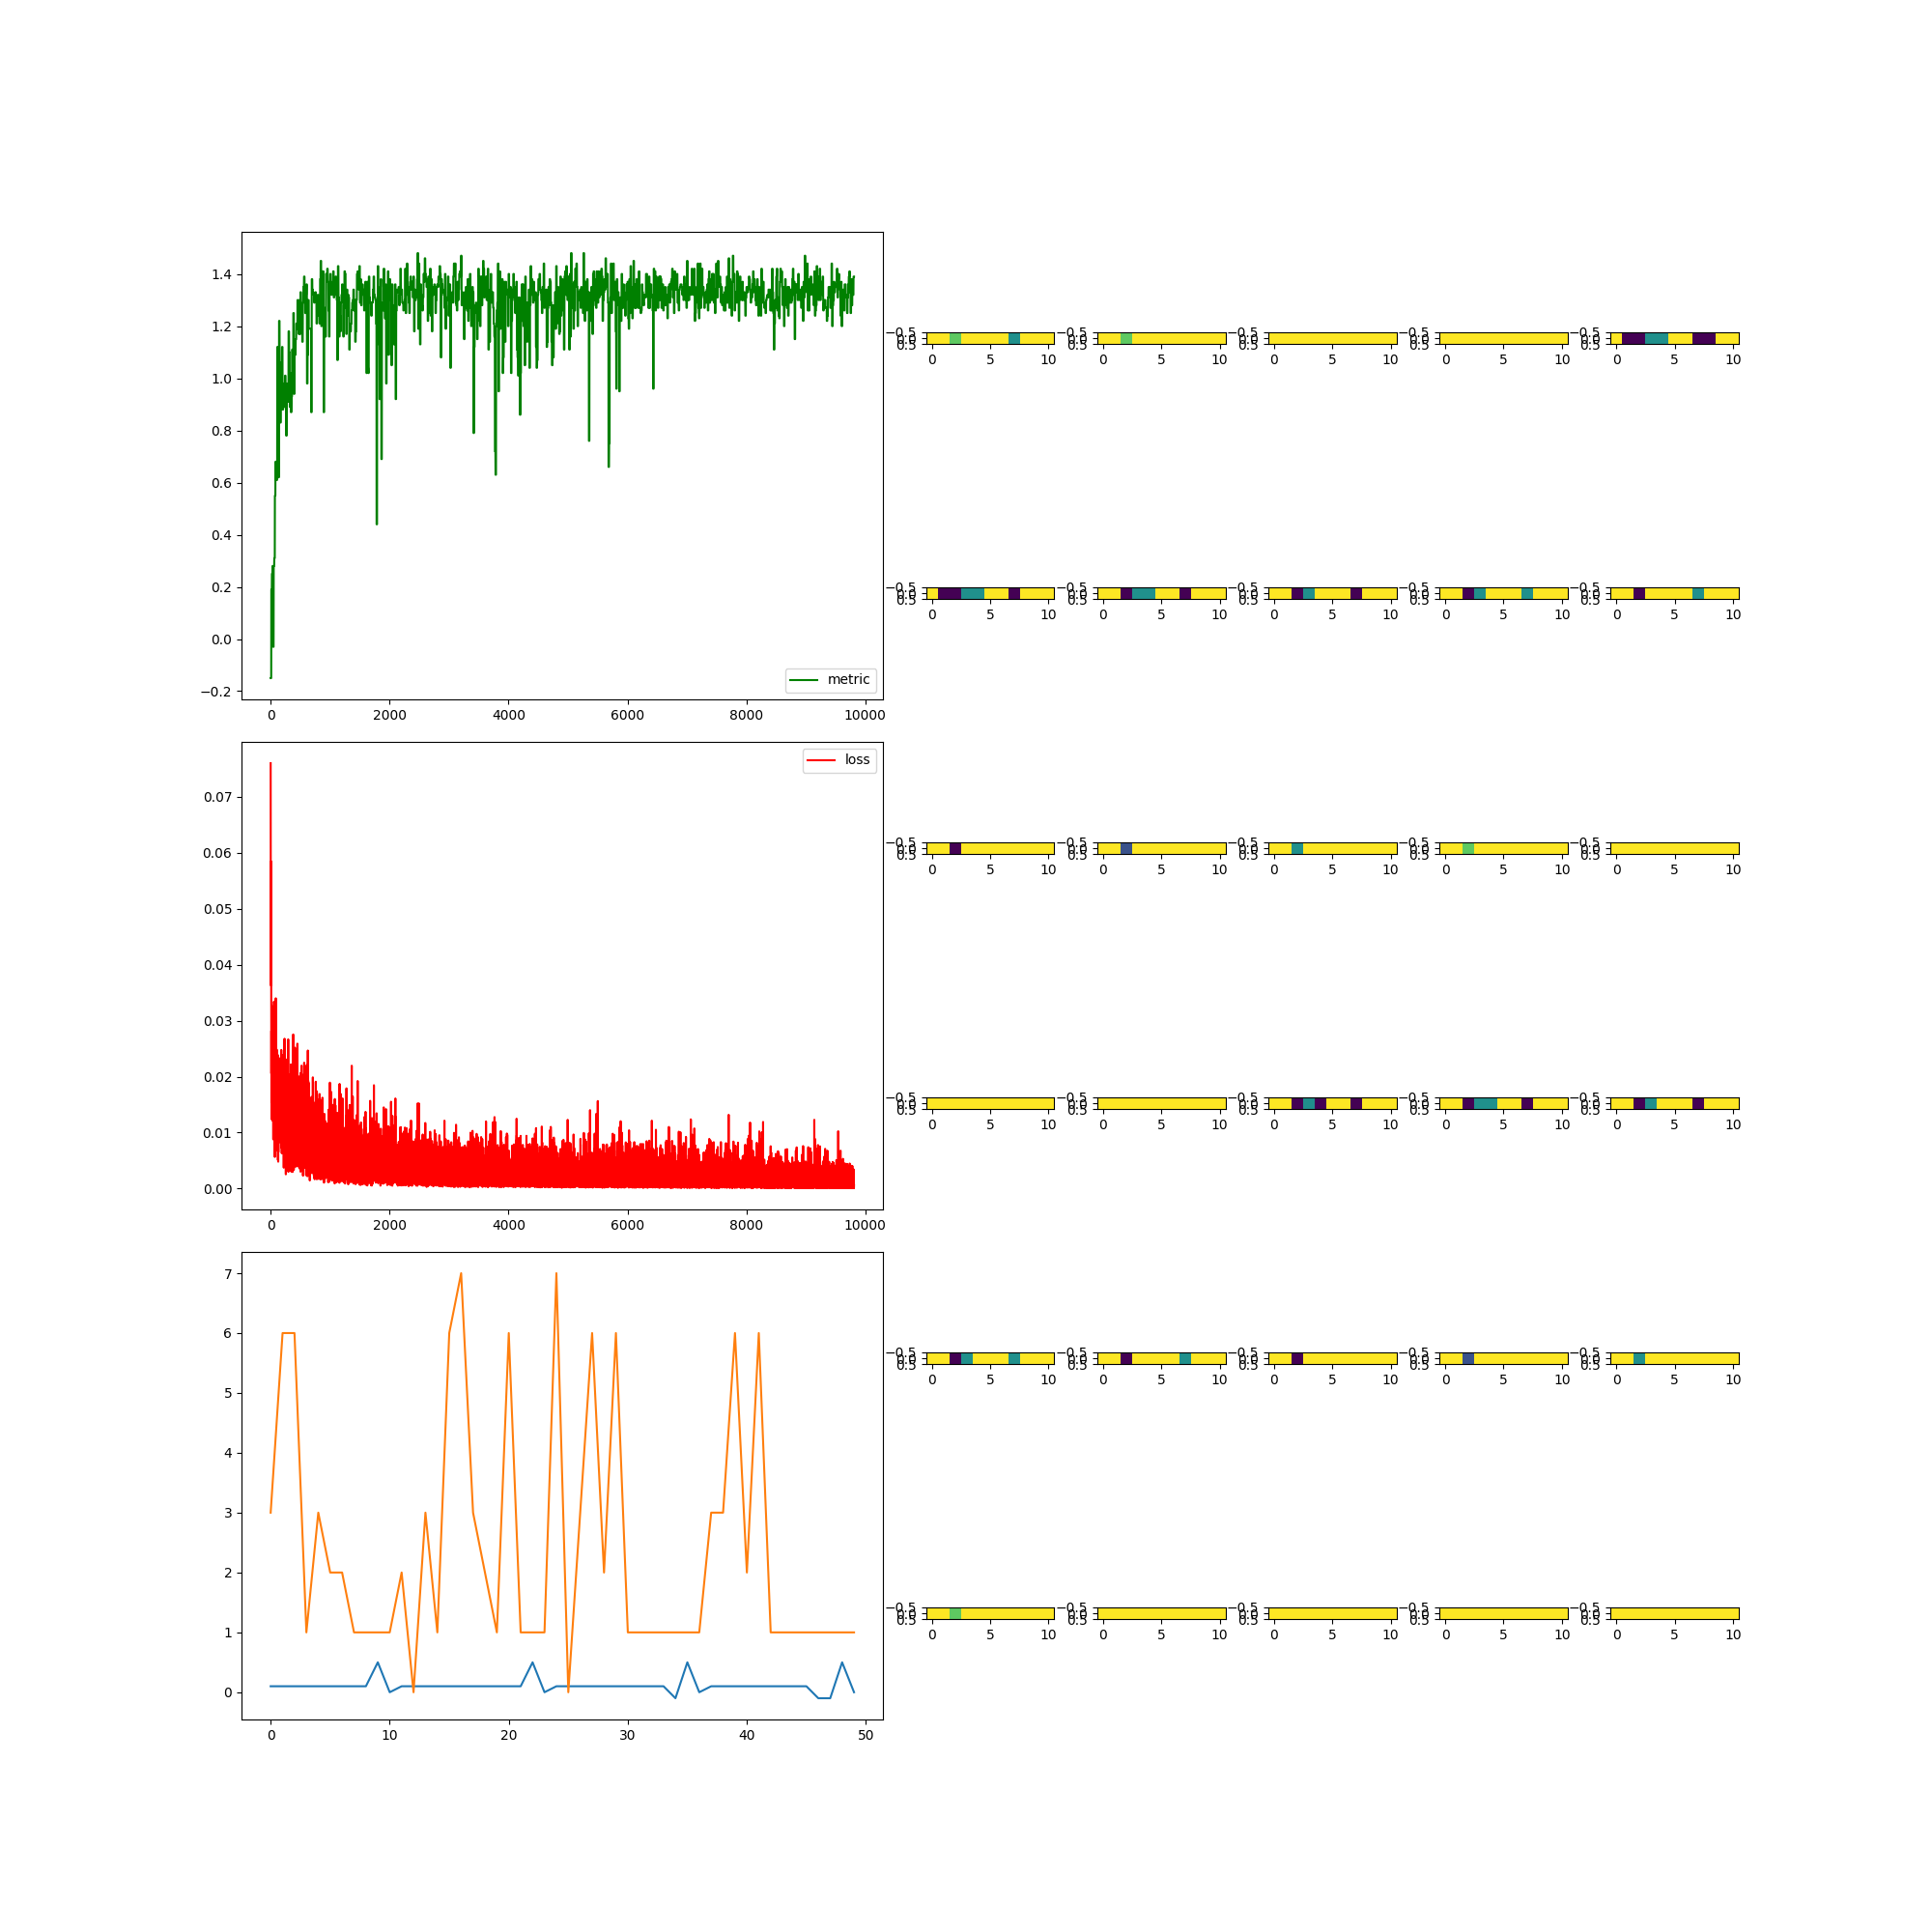

In [5]:
name = "_".join(df[df[2]==cbox2.value].values.flat)
suff = "_".join(df[df[2]==cbox2.value].iloc[0,1:])
policy_folder = "_".join(df2[df2[1]==cbox2.value].iloc[0,:])
display.Image(psols / f"{name}.png")

In [6]:
policy = Trainer.load_policy(str(psols),policy_folder)

/home/maxime/code/mcaox/iarchitect/iarchitect/solutions/WindowEnvWhatPlantGrosReseau_discount0_2_dimension16_resetTrue_maxspe5_str2/policy220308140200_980


2022-03-08 15:43:43.566238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-08 15:43:43.566323: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-08 15:43:43.566347: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ALS-358): /proc/driver/nvidia/version does not exist
2022-03-08 15:43:43.566804: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
args = read_args(psols)
env,tf_env = make_environment(args)
args

/home/maxime/code/mcaox/iarchitect/iarchitect/solutions/WindowEnvWhatPlantGrosReseau_discount0_2_dimension16_resetTrue_maxspe5_str2/args.json


Namespace(dimension=16, discount=0.2, greedy_epsilon=0.1, max_species_reset=5, name_env='windows_env_big_network', random_reset=True, strategie=2, suff=None)

In [8]:
filename = f"{psols}/behaviour_step{cbox2.value}"
filename

'/home/maxime/code/mcaox/iarchitect/iarchitect/solutions/WindowEnvWhatPlantGrosReseau_discount0_2_dimension16_resetTrue_maxspe5_str2/behaviour_step980'

In [10]:
create_policy_eval_video(tf_env,env,policy,filename,num_episodes=5,fps=5)

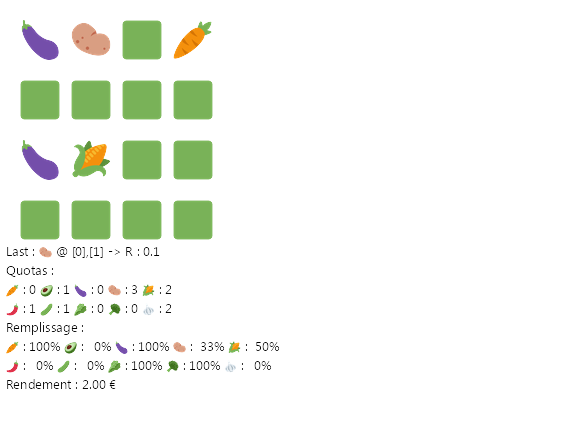

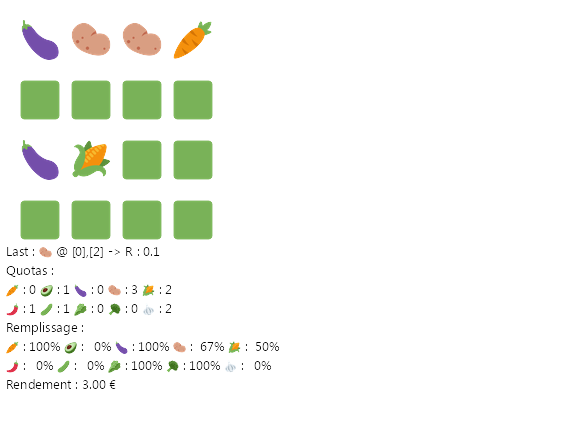

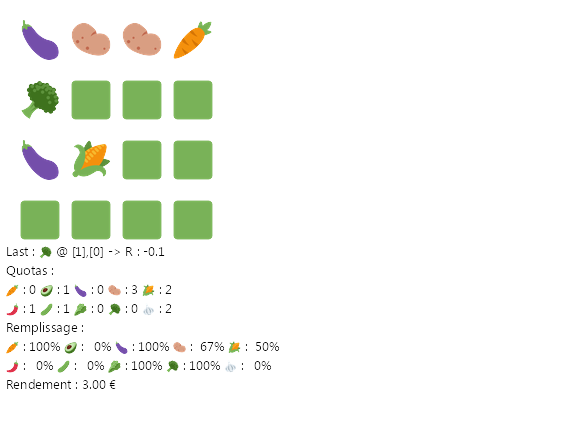

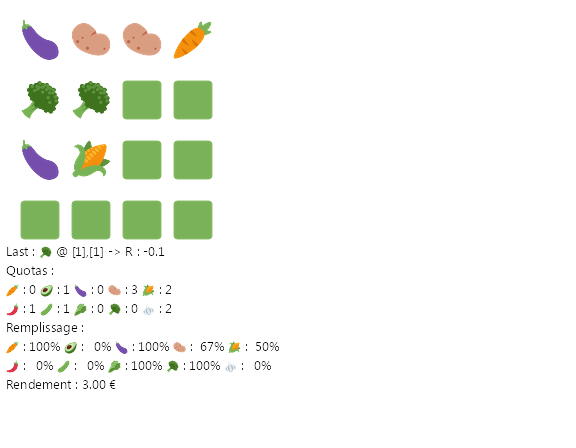

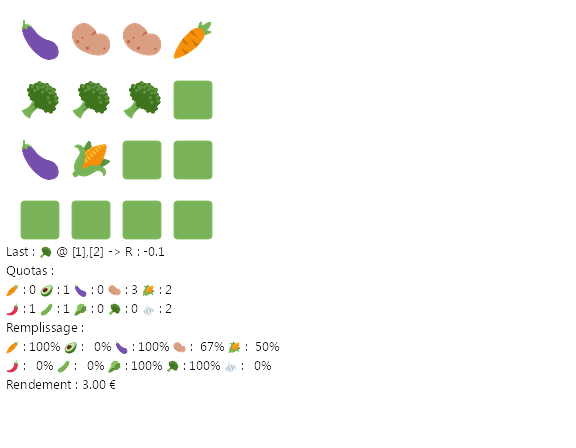

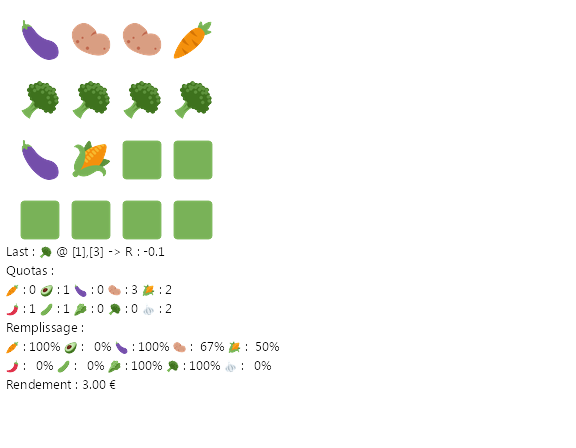

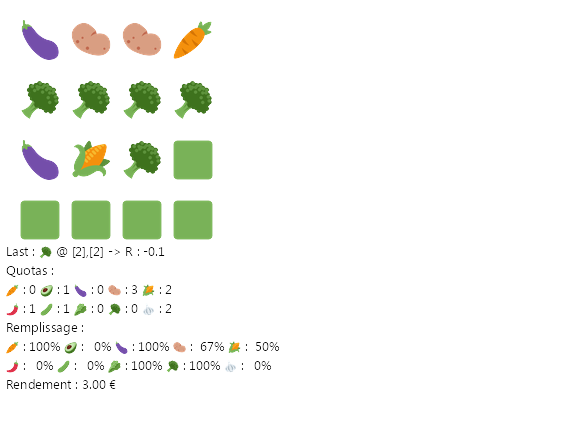

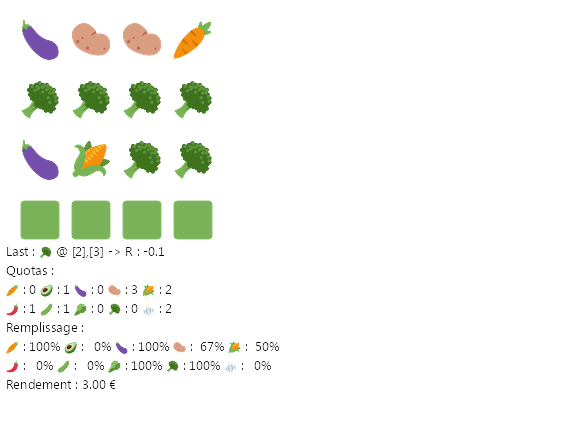

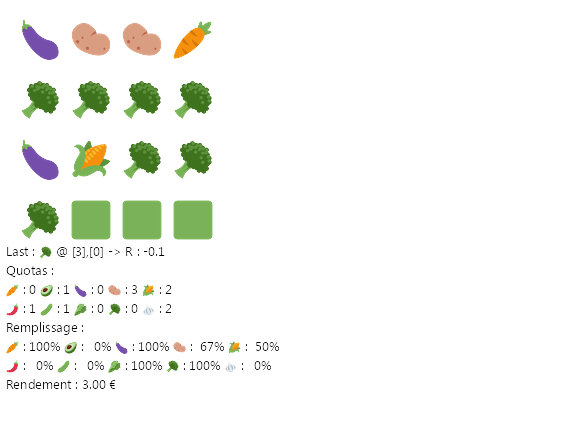

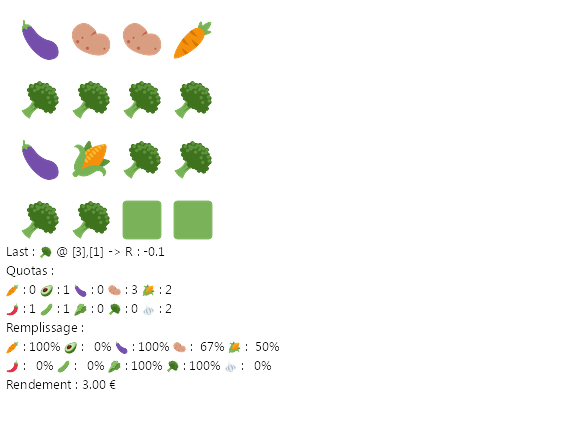

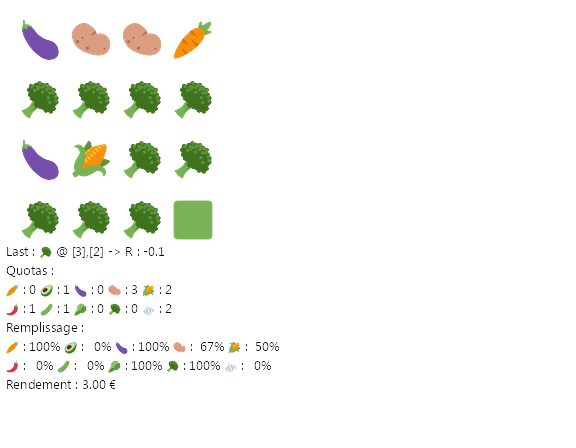

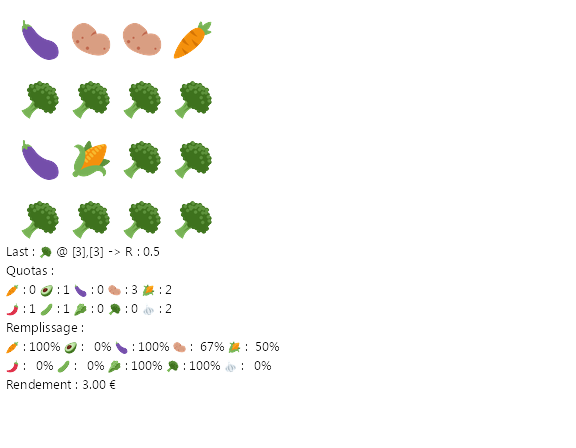

In [12]:
import numpy as np
from IPython.display import display
time_step = tf_env.reset()
while not time_step.is_last():
    action_step = policy.action(time_step)
    time_step = tf_env.step(action_step.action)
    display(env.render_image())